In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
import os

In [2]:
df_sissi = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/RNAz_Excel/sissi.xlsx"))
df_sissiz_mono = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/RNAz_Excel/sissiz_mono.xlsx"))
df_sissiz_di = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/RNAz_Excel/sissiz_di.xlsx"))
df_multiperm_mono = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/RNAz_Excel/multiperm_mono.xlsx"))
df_multiperm_di = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/RNAz_Excel/multiperm_di.xlsx"))
df_aln_shuffle = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/RNAz_Excel/alifoldz.xlsx"))

save_path = "/mnt/bernhard/Masterarbeit/2.Versuch/Plots/Randomized/RNAz/"

In [3]:
new_df_sissi = df_sissi.drop(['Sequences', 'Columns'], axis=1)
new_df_sissi.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,88.65,0.33300,0.55055,-177.93,-108.45,-104.49,-3.96,2.39,-47.16,0.61,3.24,0.998044,pos_sample_output_40355.txt
1,87.04,0.37106,0.45345,-139.62,-74.24,-69.27,-4.97,2.49,-56.73,0.53,3.54,0.998896,pos_sample_output_2635.txt
2,87.37,0.36447,0.49306,-166.50,-101.33,-95.32,-6.01,2.45,-51.47,0.61,3.24,0.998029,pos_sample_output_60625.txt
3,86.82,0.37642,0.48210,-151.54,-85.92,-80.84,-5.08,2.39,-46.34,0.57,3.40,0.998568,pos_sample_output_40301.txt
4,87.18,0.36708,0.48923,-152.03,-73.66,-68.40,-5.26,2.45,-45.79,0.48,3.66,0.999123,pos_sample_output_20012.txt
5,88.34,0.34072,0.48782,-160.91,-99.19,-94.69,-4.50,2.42,-50.62,0.62,3.20,0.997869,pos_sample_output_92804.txt
6,87.15,0.36831,0.48887,-156.46,-82.60,-77.27,-5.33,2.53,-47.45,0.53,3.54,0.998893,pos_sample_output_92186.txt
7,87.80,0.35444,0.50419,-160.96,-96.17,-91.60,-4.58,2.50,-44.49,0.60,3.28,0.998192,pos_sample_output_96943.txt
8,87.03,0.37370,0.51228,-166.14,-89.77,-86.00,-3.77,2.43,-44.75,0.54,3.51,0.998830,pos_sample_output_69933.txt
9,86.74,0.37938,0.47784,-160.37,-82.72,-76.79,-5.93,2.49,-53.72,0.52,3.57,0.998962,pos_sample_output_57307.txt


In [4]:
new_df_sissi[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,87.337342,0.363568,0.484716,-155.190325,-87.033106,-82.332972,-4.700164,2.421572,-50.033957,0.559569,3.396894,0.998376
std,0.692722,0.016042,0.026802,9.888655,13.092931,12.884398,0.980755,0.083053,6.870997,0.067061,0.234612,0.000937
min,84.160000,0.300840,0.371600,-198.590000,-150.920000,-145.260000,-9.630000,2.010000,-80.170000,0.270000,2.150000,0.984044
25%,86.880000,0.352660,0.466750,-161.820000,-95.890000,-91.040000,-5.350000,2.370000,-53.290000,0.510000,3.240000,0.998042
50%,87.350000,0.363370,0.484620,-155.070000,-86.920000,-82.190000,-4.700000,2.420000,-48.240000,0.560000,3.440000,0.998659
75%,87.810000,0.374220,0.502880,-148.440000,-78.130000,-73.540000,-4.060000,2.480000,-45.140000,0.610000,3.580000,0.998977
max,89.940000,0.438300,0.601320,-115.870000,-35.980000,-32.920000,0.510000,2.820000,-33.620000,0.800000,3.810000,0.999352


In [5]:
new_df_sissiz_mono = df_sissiz_mono.drop(['Sequences', 'Columns'], axis=1)
new_df_sissiz_mono.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,87.70,0.36799,0.50898,-139.04,-12.48,-12.36,-0.11,1.85,-31.86,0.09,2.81,0.995528,neg_sample_SISSIz_mono_output_69993.txt
1,86.96,0.38974,0.49150,-126.25,-7.86,-7.88,0.02,1.60,-31.29,0.06,2.68,0.994267,neg_sample_SISSIz_mono_output_47606.txt
2,86.56,0.39278,0.53351,-148.46,-7.76,-7.57,-0.19,1.72,-34.70,0.05,2.63,0.993653,neg_sample_SISSIz_mono_output_20209.txt
3,86.77,0.39291,0.53712,-139.31,-11.76,-11.53,-0.23,1.97,-29.96,0.08,2.80,0.995457,neg_sample_SISSIz_mono_output_57207.txt
4,87.20,0.38030,0.52836,-135.38,-11.34,-11.45,0.11,1.66,-28.01,0.08,2.78,0.995240,neg_sample_SISSIz_mono_output_74674.txt
5,87.02,0.38628,0.48932,-130.09,-13.42,-13.50,0.07,1.57,-34.41,0.10,2.90,0.996235,neg_sample_SISSIz_mono_output_3876.txt
6,87.62,0.37382,0.49076,-131.79,-13.99,-13.95,-0.04,1.43,-34.06,0.11,2.93,0.996446,neg_sample_SISSIz_mono_output_92843.txt
7,87.30,0.38167,0.51918,-141.37,-13.72,-13.86,0.14,1.52,-31.77,0.10,2.89,0.996171,neg_sample_SISSIz_mono_output_63802.txt
8,87.71,0.36427,0.50256,-133.46,-14.15,-14.21,0.06,1.69,-30.57,0.11,2.91,0.996322,neg_sample_SISSIz_mono_output_92718.txt
9,87.75,0.36950,0.53555,-138.21,-10.00,-10.03,0.03,1.65,-29.34,0.07,2.70,0.994474,neg_sample_SISSIz_mono_output_31239.txt


In [6]:
new_df_sissiz_mono[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,87.263850,0.380672,0.515320,-134.960808,-10.634386,-10.686824,0.052424,1.577322,-30.393272,0.078418,2.766299,0.994917
std,0.422467,0.010500,0.022822,8.411645,3.927810,3.944147,0.259805,0.140053,2.914331,0.027701,0.152179,0.001471
min,85.540000,0.333780,0.422440,-170.600000,-30.700000,-30.640000,-0.720000,0.000000,-49.470000,-0.000000,2.290000,0.987879
25%,86.980000,0.373550,0.499840,-140.520000,-13.130000,-13.180000,-0.050000,1.480000,-32.110000,0.060000,2.660000,0.994018
50%,87.270000,0.380550,0.515280,-134.910000,-10.340000,-10.380000,0.040000,1.580000,-30.310000,0.080000,2.760000,0.995093
75%,87.550000,0.387700,0.530400,-129.210000,-7.830000,-7.860000,0.120000,1.670000,-28.520000,0.100000,2.870000,0.996010
max,89.120000,0.422600,0.610810,-105.470000,0.000000,0.000000,3.880000,2.120000,-18.450000,0.210000,3.370000,0.998486


In [7]:
new_df_sissiz_di = df_sissiz_di.drop(['Sequences', 'Columns'], axis=1)
new_df_sissiz_di.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,87.17,0.38206,0.52817,-142.09,-11.29,-11.24,-0.05,1.60,-31.42,0.08,2.78,0.995270,neg_sample_SISSIz_di_output_44438.txt
1,87.45,0.37453,0.50406,-132.38,-9.20,-9.25,0.05,1.61,-29.69,0.07,2.71,0.994574,neg_sample_SISSIz_di_output_74905.txt
2,87.35,0.37923,0.48494,-117.26,-13.11,-13.14,0.04,1.59,-27.58,0.11,2.94,0.996515,neg_sample_SISSIz_di_output_37665.txt
3,87.09,0.38446,0.51886,-139.44,-21.73,-21.73,0.01,1.52,-30.35,0.16,3.20,0.997874,neg_sample_SISSIz_di_output_98138.txt
4,87.01,0.38724,0.53654,-147.46,-10.23,-10.32,0.09,1.48,-33.90,0.07,2.74,0.994824,neg_sample_SISSIz_di_output_81543.txt
5,87.06,0.38283,0.52030,-145.23,-17.83,-17.85,0.02,1.54,-33.08,0.12,3.00,0.996889,neg_sample_SISSIz_di_output_33393.txt
6,87.60,0.36965,0.48552,-136.69,-11.58,-11.68,0.11,1.59,-38.04,0.08,2.76,0.995050,neg_sample_SISSIz_di_output_3439.txt
7,87.45,0.37405,0.51768,-128.57,-12.31,-12.40,0.10,1.38,-25.55,0.10,2.88,0.996063,neg_sample_SISSIz_di_output_63353.txt
8,86.70,0.39549,0.49955,-128.28,-8.95,-8.95,0.00,1.52,-29.12,0.07,2.75,0.994982,neg_sample_SISSIz_di_output_8868.txt
9,86.75,0.39194,0.55058,-148.27,-15.97,-16.28,0.31,1.43,-32.47,0.11,2.97,0.996673,neg_sample_SISSIz_di_output_74304.txt


In [8]:
new_df_sissiz_di[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,87.190841,0.381613,0.514828,-136.090488,-11.733625,-11.769870,0.036237,1.595435,-31.133077,0.085742,2.808775,0.995302
std,0.431167,0.010741,0.023736,8.780015,4.168603,4.178938,0.260979,0.137418,2.898947,0.028900,0.157024,0.001413
min,85.260000,0.338130,0.424960,-175.020000,-32.980000,-32.950000,-0.810000,1.090000,-49.970000,0.000000,2.300000,0.988193
25%,86.900000,0.374320,0.498880,-141.950000,-14.370000,-14.420000,-0.070000,1.500000,-32.820000,0.070000,2.700000,0.994477
50%,87.200000,0.381560,0.514870,-136.000000,-11.470000,-11.490000,0.030000,1.590000,-31.020000,0.080000,2.800000,0.995461
75%,87.490000,0.388893,0.530630,-130.110000,-8.740000,-8.780000,0.110000,1.682500,-29.250000,0.100000,2.910000,0.996332
max,88.820000,0.428170,0.613660,-105.760000,-0.320000,-0.380000,2.940000,2.220000,-20.060000,0.220000,3.440000,0.998674


In [9]:
new_df_multiperm_mono = df_multiperm_mono.drop(['Sequences', 'Columns'], axis=1)
new_df_multiperm_mono.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,88.11,0.35098,0.51519,-132.60,-34.22,-33.00,-1.22,2.10,-27.65,0.26,3.52,0.998850,neg_sample_MULTIPERM_mono_output_56361.txt
1,88.11,0.35098,0.51519,-134.75,-27.00,-26.51,-0.50,2.12,-28.70,0.20,3.31,0.998287,neg_sample_MULTIPERM_mono_output_22034.txt
2,88.11,0.35098,0.51519,-133.79,-30.65,-29.80,-0.85,2.10,-28.22,0.23,3.42,0.998618,neg_sample_MULTIPERM_mono_output_26894.txt
3,88.11,0.35098,0.51519,-139.20,-28.03,-27.39,-0.64,2.05,-30.87,0.20,3.31,0.998287,neg_sample_MULTIPERM_mono_output_40005.txt
4,88.11,0.35098,0.51519,-132.63,-30.43,-29.12,-1.31,2.07,-27.66,0.23,3.42,0.998618,neg_sample_MULTIPERM_mono_output_43518.txt
5,88.11,0.35098,0.51519,-142.02,-37.16,-35.77,-1.39,2.17,-32.27,0.26,3.52,0.998850,neg_sample_MULTIPERM_mono_output_52528.txt
6,88.11,0.35098,0.51519,-131.89,-29.15,-27.89,-1.26,2.12,-27.29,0.22,3.39,0.998521,neg_sample_MULTIPERM_mono_output_36707.txt
7,88.11,0.35098,0.51519,-135.73,-26.75,-26.02,-0.73,2.00,-29.17,0.20,3.31,0.998287,neg_sample_MULTIPERM_mono_output_65333.txt
8,88.11,0.35098,0.51519,-136.21,-36.65,-35.58,-1.07,2.04,-29.41,0.27,3.54,0.998910,neg_sample_MULTIPERM_mono_output_63765.txt
9,88.11,0.35098,0.51519,-136.63,-33.29,-32.05,-1.24,2.15,-29.63,0.24,3.46,0.998705,neg_sample_MULTIPERM_mono_output_53697.txt


In [10]:
new_df_multiperm_mono[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,8.811000e+01,3.509800e-01,5.151900e-01,-137.341969,-31.813891,-30.748140,-1.065722,2.104201,-29.968301,0.231631,3.420693,0.998587
std,1.107315e-10,3.032034e-13,1.167294e-12,3.140191,4.079017,4.058607,0.422668,0.060889,1.542994,0.029274,0.098507,0.000277
min,8.811000e+01,3.509800e-01,5.151900e-01,-153.560000,-54.740000,-52.880000,-2.910000,1.830000,-37.910000,0.130000,2.990000,0.996842
25%,8.811000e+01,3.509800e-01,5.151900e-01,-139.390000,-34.470000,-33.390000,-1.310000,2.060000,-30.970000,0.210000,3.350000,0.998411
50%,8.811000e+01,3.509800e-01,5.151900e-01,-137.230000,-31.640000,-30.580000,-1.090000,2.100000,-29.910000,0.230000,3.420000,0.998618
75%,8.811000e+01,3.509800e-01,5.151900e-01,-135.190000,-28.970000,-27.930000,-0.870000,2.140000,-28.910000,0.250000,3.490000,0.998782
max,8.811000e+01,3.509800e-01,5.151900e-01,-125.170000,-17.040000,-16.170000,3.720000,2.380000,-24.010000,0.390000,3.720000,0.999222


In [11]:
new_df_multiperm_di = df_multiperm_di.drop(['Sequences', 'Columns'], axis=1)
new_df_multiperm_di.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,88.11,0.35098,0.51519,-136.23,-31.76,-30.73,-1.03,2.04,-29.39,0.23,3.42,0.998618,neg_sample_MULTIPERM_di_output_19968.txt
1,88.11,0.35098,0.51519,-140.93,-38.85,-37.24,-1.62,2.14,-31.74,0.28,3.57,0.998964,neg_sample_MULTIPERM_di_output_65724.txt
2,88.11,0.35098,0.51519,-136.24,-31.23,-29.40,-1.82,2.02,-29.44,0.23,3.42,0.998618,neg_sample_MULTIPERM_di_output_86585.txt
3,88.11,0.35098,0.51519,-133.99,-27.89,-26.90,-0.99,2.09,-28.33,0.21,3.35,0.998411,neg_sample_MULTIPERM_di_output_35757.txt
4,88.11,0.35098,0.51519,-135.94,-36.23,-34.81,-1.42,2.17,-29.27,0.27,3.54,0.998910,neg_sample_MULTIPERM_di_output_69684.txt
5,88.11,0.35098,0.51519,-139.68,-30.75,-30.28,-0.47,2.00,-31.10,0.22,3.39,0.998521,neg_sample_MULTIPERM_di_output_68421.txt
6,88.11,0.35098,0.51519,-132.52,-30.07,-29.16,-0.91,2.08,-27.58,0.23,3.42,0.998618,neg_sample_MULTIPERM_di_output_26256.txt
7,88.11,0.35098,0.51519,-140.15,-26.50,-25.22,-1.28,2.15,-31.37,0.19,3.27,0.998147,neg_sample_MULTIPERM_di_output_30523.txt
8,88.11,0.35098,0.51519,-137.92,-28.90,-27.80,-1.10,2.20,-30.21,0.21,3.35,0.998411,neg_sample_MULTIPERM_di_output_84074.txt
9,88.11,0.35098,0.51519,-134.95,-29.86,-28.15,-1.71,2.17,-28.77,0.22,3.39,0.998521,neg_sample_MULTIPERM_di_output_22639.txt


In [12]:
new_df_multiperm_di[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,8.811000e+01,3.509800e-01,5.151900e-01,-137.155862,-31.492630,-30.382913,-1.109720,2.108365,-29.862994,0.229586,3.413428,0.998565
std,1.107315e-10,3.032034e-13,1.167294e-12,3.207167,4.151995,4.128134,0.430156,0.061168,1.575480,0.029719,0.101106,0.000289
min,8.811000e+01,3.509800e-01,5.151900e-01,-154.120000,-53.260000,-52.760000,-2.610000,1.850000,-38.200000,0.120000,2.940000,0.996515
25%,8.811000e+01,3.509800e-01,5.151900e-01,-139.230000,-34.180000,-33.060000,-1.360000,2.070000,-30.880000,0.210000,3.350000,0.998411
50%,8.811000e+01,3.509800e-01,5.151900e-01,-137.050000,-31.315000,-30.210000,-1.140000,2.110000,-29.810000,0.230000,3.420000,0.998618
75%,8.811000e+01,3.509800e-01,5.151900e-01,-134.950000,-28.600000,-27.510000,-0.910000,2.150000,-28.780000,0.250000,3.490000,0.998782
max,8.811000e+01,3.509800e-01,5.151900e-01,-124.460000,-16.020000,-14.920000,3.590000,2.390000,-23.590000,0.390000,3.720000,0.999222


In [13]:
new_df_aln_shuffle = df_aln_shuffle.drop(['Sequences', 'Columns', 'File'], axis=1)
new_df_aln_shuffle.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
0,88.11,0.35098,0.51519,-142.04,-51.94,-48.92,-3.02,2.44,-32.27,0.37,3.71,0.999210
1,88.11,0.35098,0.51519,-146.65,-64.44,-61.38,-3.06,2.46,-34.54,0.44,3.70,0.999194
2,88.11,0.35098,0.51519,-142.65,-50.37,-47.86,-2.52,2.43,-32.58,0.35,3.70,0.999185
3,88.11,0.35098,0.51519,-140.60,-52.64,-50.41,-2.23,2.33,-31.58,0.37,3.71,0.999210
4,88.11,0.35098,0.51519,-143.56,-57.45,-54.78,-2.66,2.46,-33.02,0.40,3.72,0.999223
5,88.11,0.35098,0.51519,-150.93,-62.80,-59.59,-3.21,2.45,-36.65,0.42,3.71,0.999215
6,88.11,0.35098,0.51519,-141.46,-55.61,-52.38,-3.23,2.41,-32.00,0.39,3.72,0.999222
7,88.11,0.35098,0.51519,-142.21,-60.35,-57.69,-2.66,2.41,-32.36,0.42,3.71,0.999215
8,88.11,0.35098,0.51519,-141.37,-55.72,-53.09,-2.62,2.45,-31.95,0.39,3.72,0.999222
9,88.11,0.35098,0.51519,-142.92,-49.64,-46.92,-2.73,2.36,-32.73,0.35,3.70,0.999185


In [14]:
new_df_aln_shuffle[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,8.811000e+01,3.509800e-01,5.151900e-01,-143.481291,-56.634725,-53.802434,-2.832293,2.416482,-32.996248,0.394431,3.702952,0.999196
std,1.107315e-10,3.032034e-13,1.167294e-12,3.237949,6.207346,6.019122,0.478151,0.064526,1.589902,0.039347,0.023294,0.000038
min,8.811000e+01,3.509800e-01,5.151900e-01,-160.060000,-89.860000,-85.900000,-4.500000,2.140000,-41.160000,0.260000,3.320000,0.998331
25%,8.811000e+01,3.509800e-01,5.151900e-01,-145.570000,-60.680000,-57.720000,-3.160000,2.370000,-34.020000,0.370000,3.700000,0.999185
50%,8.811000e+01,3.509800e-01,5.151900e-01,-143.360000,-56.260000,-53.430000,-2.810000,2.420000,-32.930000,0.390000,3.710000,0.999210
75%,8.811000e+01,3.509800e-01,5.151900e-01,-141.260000,-52.240000,-49.530000,-2.500000,2.460000,-31.900000,0.420000,3.720000,0.999221
max,8.811000e+01,3.509800e-01,5.151900e-01,-131.810000,-36.590000,-34.020000,1.160000,2.660000,-27.260000,0.590000,3.720000,0.999223


In [15]:
def plot_columns(columnname):
    dataframes = [new_df_sissi, new_df_sissiz_mono, new_df_sissiz_di, new_df_multiperm_mono, new_df_multiperm_di, new_df_aln_shuffle]
    labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
    data = [df[columnname] for df in dataframes]
    # thresholds = [0.9]

    plt.figure(figsize=(12, 8))
    plt.boxplot(data, labels=labels)

    # for t in thresholds:
    #     plt.axhline(y=t, color='red', linestyle='--', linewidth=1)

    plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
    plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
    plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')

    if save_path:
        filename = os.path.join(save_path, f"RNAz: Boxplot {columnname} with randomized samples")
        plt.savefig(filename, dpi=300, bbox_inches='tight')

    # plt.title(f'RNAz: Boxplot {columnname} with randomized samples')
    plt.legend()
    plt.show()

## SVM RNA-class probability

/tmp/ipykernel_5513/2583880072.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_5513/2583880072.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_5513/2583880072.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_5513/2583880072.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


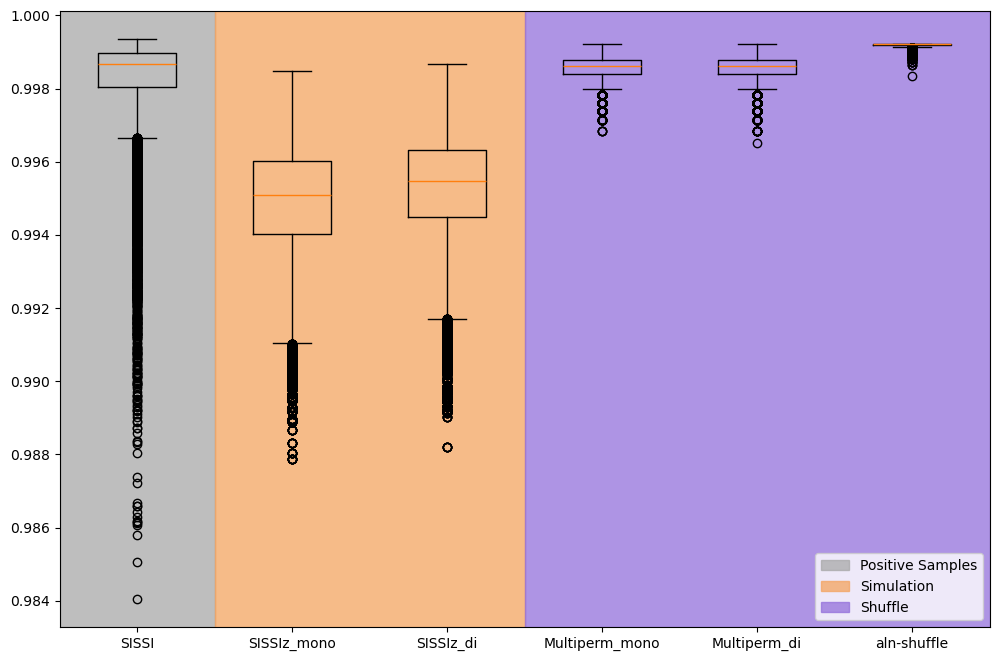

In [16]:
plot_columns('SVM RNA-class probability')

## Structure conservation index (SCI)

/tmp/ipykernel_5513/2583880072.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_5513/2583880072.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_5513/2583880072.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_5513/2583880072.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


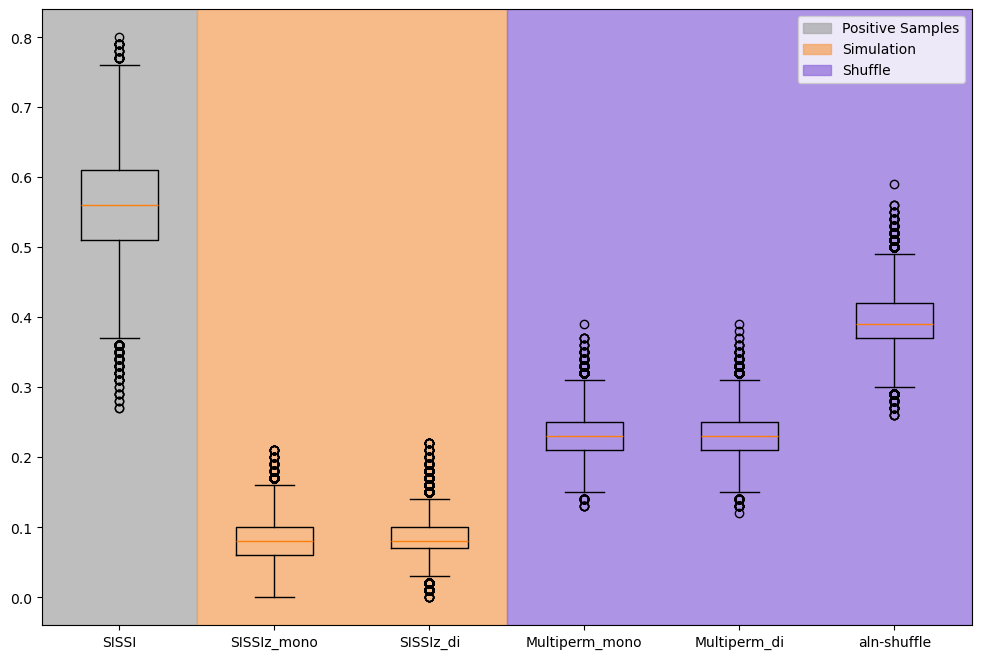

In [17]:
plot_columns('Structure conservation index')


## Mean z-score

/tmp/ipykernel_5513/2583880072.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_5513/2583880072.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_5513/2583880072.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_5513/2583880072.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


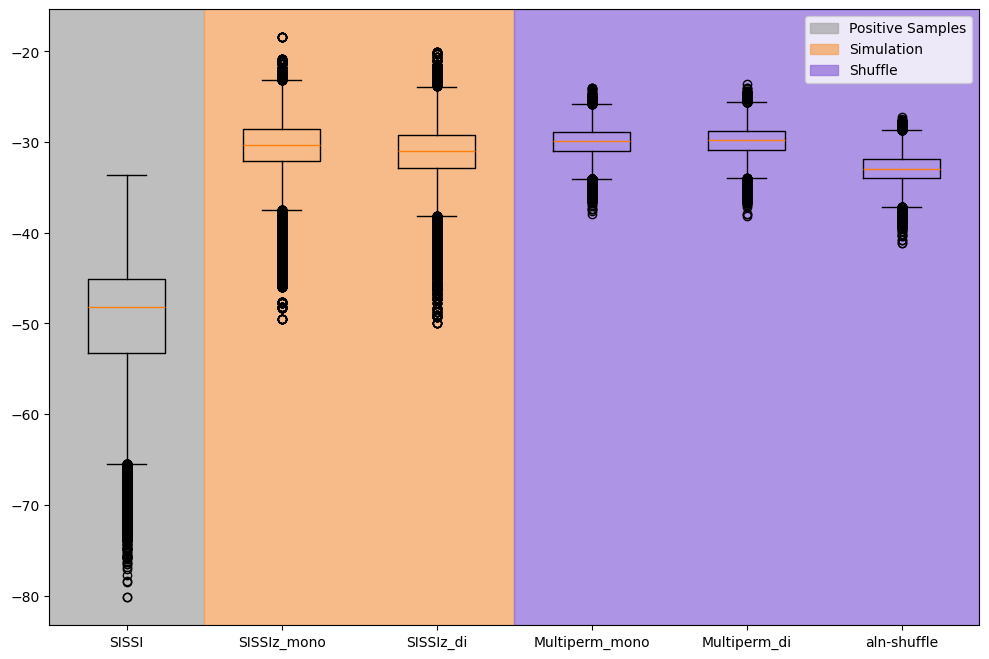

In [18]:
plot_columns('Mean z-score')

## Consensus MFE

/tmp/ipykernel_5513/2583880072.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_5513/2583880072.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_5513/2583880072.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_5513/2583880072.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


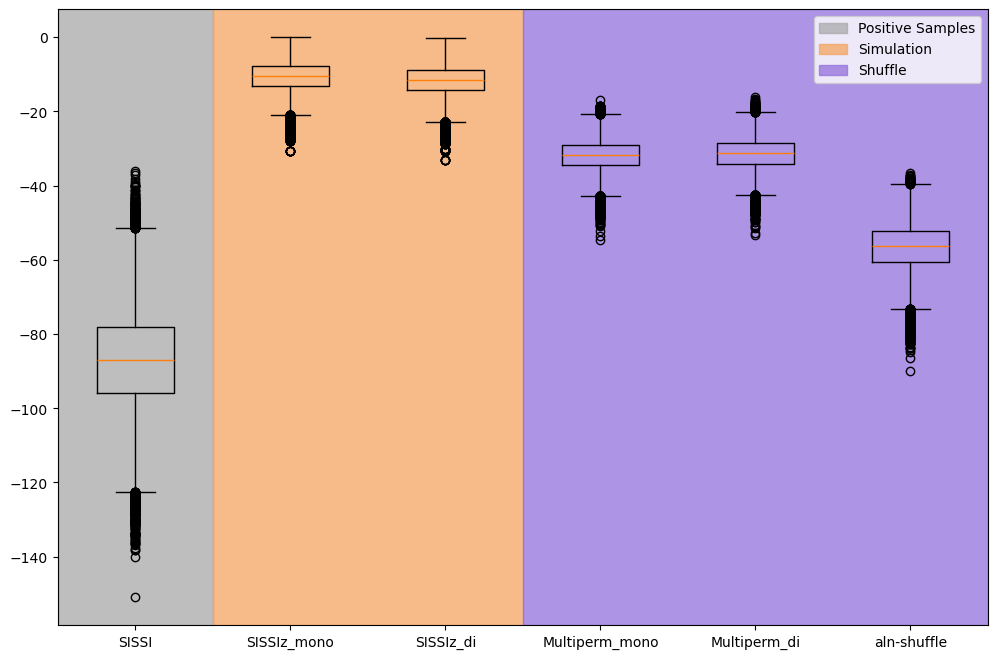

In [19]:
plot_columns('Consensus MFE')

## Mean pairwise identity

/tmp/ipykernel_5513/2583880072.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_5513/2583880072.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_5513/2583880072.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_5513/2583880072.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


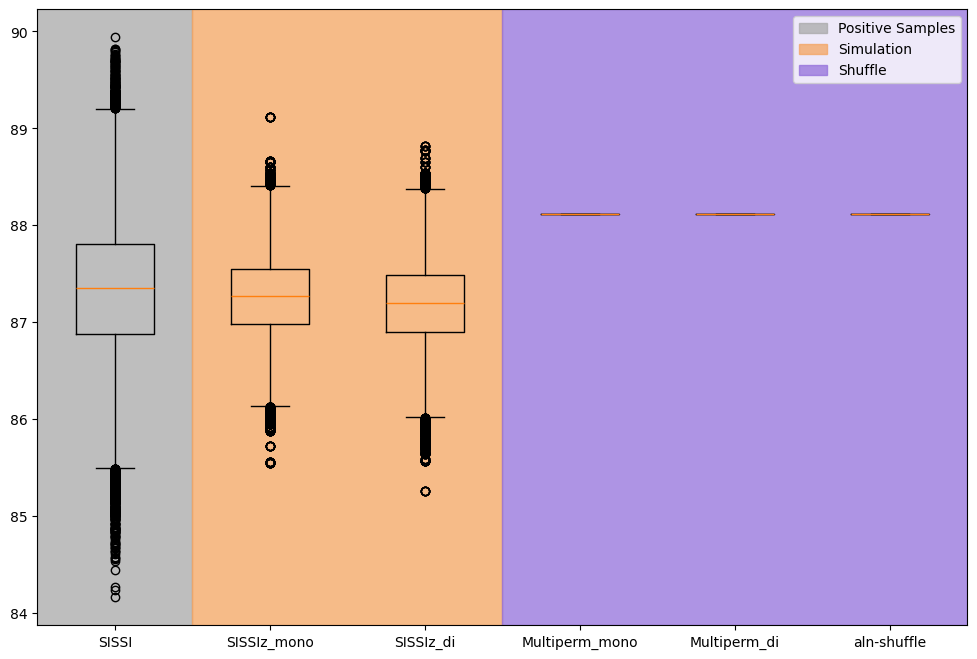

In [20]:
plot_columns('Mean pairwise identity')